In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

# **Analysing and Performing basic data analytics on data**

**We will perform the following operations**:

a. Having look at head (top) values to have basic undertsanding of data

b. Checking data type of each column

c. Determining shape of data

d. Checking null values in data 

In [3]:
df.head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


**Data Types**

In [4]:
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

**Shape**

In [5]:
df.shape

(568630, 31)

**Checking for null values**

In [6]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Since id column is of no use for performing our data analysis/Machine learning operations we will drop it**

In [7]:
df = df.drop('id', axis=1)

# **Explanatory Data Analysis**

**First we will import both the libraries: i.e Matplotlib and seaborn**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

**Create a countplot for class function**

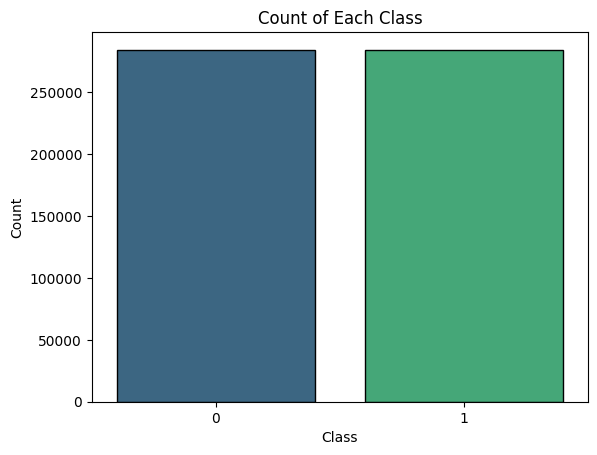

In [9]:
sns.countplot(x='Class', data=df, palette='viridis', edgecolor='black')

plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

**Since data is normally distributed, there is no need to perform over-sampling or under-sampling**

# **Identify Outliers**

**Z-Score: The Z-score measures how many standard deviations a point is from the mean. A Z-score above 3 or below -3 is often considered an outlier.**

In [10]:
from scipy.stats import zscore
df['Amount_z'] = zscore(df['Amount'])
outliers = df[df['Amount_z'].abs() > 3]

outliers

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_z


**There is no outliers in the data as per z-score**

**Quartiles**

In [11]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR))]

outliers

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_z


**There is no outliers in the data as per quartiles check**

# **Checking for Skewness**

In [12]:
from scipy.stats import skew
skewness = skew(df['Amount'])
print(f"Skewness of Amount: {skewness}")


Skewness of Amount: 0.0016555805938584913


**The skewness of the Amount column is approximately 0.0017, which is very close to 0. This indicates that the Amount data is almost perfectly symmetrical, meaning that there is no significant skew in the distribution.**

# **ANOVA**

In [13]:
from scipy.stats import f_oneway


f_stats = []
p_vals = []


for col in df.drop('Class', axis=1).columns:
    f_stat, p_val = f_oneway(df[df['Class'] == 0][col], df[df['Class'] == 1][col])
    f_stats.append(f_stat)
    p_vals.append(p_val)

# Print results
for col, f_stat, p_val in zip(df.drop('Class', axis=1).columns, f_stats, p_vals):
    print(f"Feature: {col}, F-statistic: {f_stat}, p-value: {p_val}")

significance_level = 0.05
significant_features = [
    col for col, p_val in zip(df.drop('Class', axis=1).columns, p_vals) if p_val < significance_level
]
print(f"Significant Features: {significant_features}")


Feature: V1, F-statistic: 195445.59812781826, p-value: 0.0
Feature: V2, F-statistic: 181485.442821522, p-value: 0.0
Feature: V3, F-statistic: 494733.3662543549, p-value: 0.0
Feature: V4, F-statistic: 672018.0343612591, p-value: 0.0
Feature: V5, F-statistic: 73654.62506078459, p-value: 0.0
Feature: V6, F-statistic: 132777.26194165015, p-value: 0.0
Feature: V7, F-statistic: 180859.60443056875, p-value: 0.0
Feature: V8, F-statistic: 12090.980612753207, p-value: 0.0
Feature: V9, F-statistic: 296647.1486034876, p-value: 0.0
Feature: V10, F-statistic: 472480.74982707, p-value: 0.0
Feature: V11, F-statistic: 627423.1195097895, p-value: 0.0
Feature: V12, F-statistic: 820689.6534694798, p-value: 0.0
Feature: V13, F-statistic: 2889.5592954321282, p-value: 0.0
Feature: V14, F-statistic: 1051869.7004515855, p-value: 0.0
Feature: V15, F-statistic: 820.0407554512486, p-value: 3.187842311682141e-180
Feature: V16, F-statistic: 278698.5981427977, p-value: 0.0
Feature: V17, F-statistic: 166921.641694102

**Interpretation:**

**Statistical Significance**

All features except Amount and Amount_z have p-values of 0 or extremely low values, indicating they are statistically significant.

These significant features (V1 to V28) exhibit substantial differences in means between the two classes (Class = 0 and Class = 1), making them relevant for modeling.

**Non-Significant Features:**

Amount and Amount_z have p-values > 0.05 (0.088), suggesting no strong evidence of significant differences in means for fraud vs. non-fraud transactions based on these features. However, they could still be useful in combination with other features in the model.

**Feature Importance:**

Features like V14 and V12 have the highest F-statistics (e.g., 1,051,869.7 and 820,689.6), indicating they contribute strongly to differentiating between the two classes.


# Checking for Correlation

**Checking correlation of each variable with target variable Class**

In [14]:
correlation_matrix = df.corr()

Text(0.5, 1.0, 'Correlation Matrix')

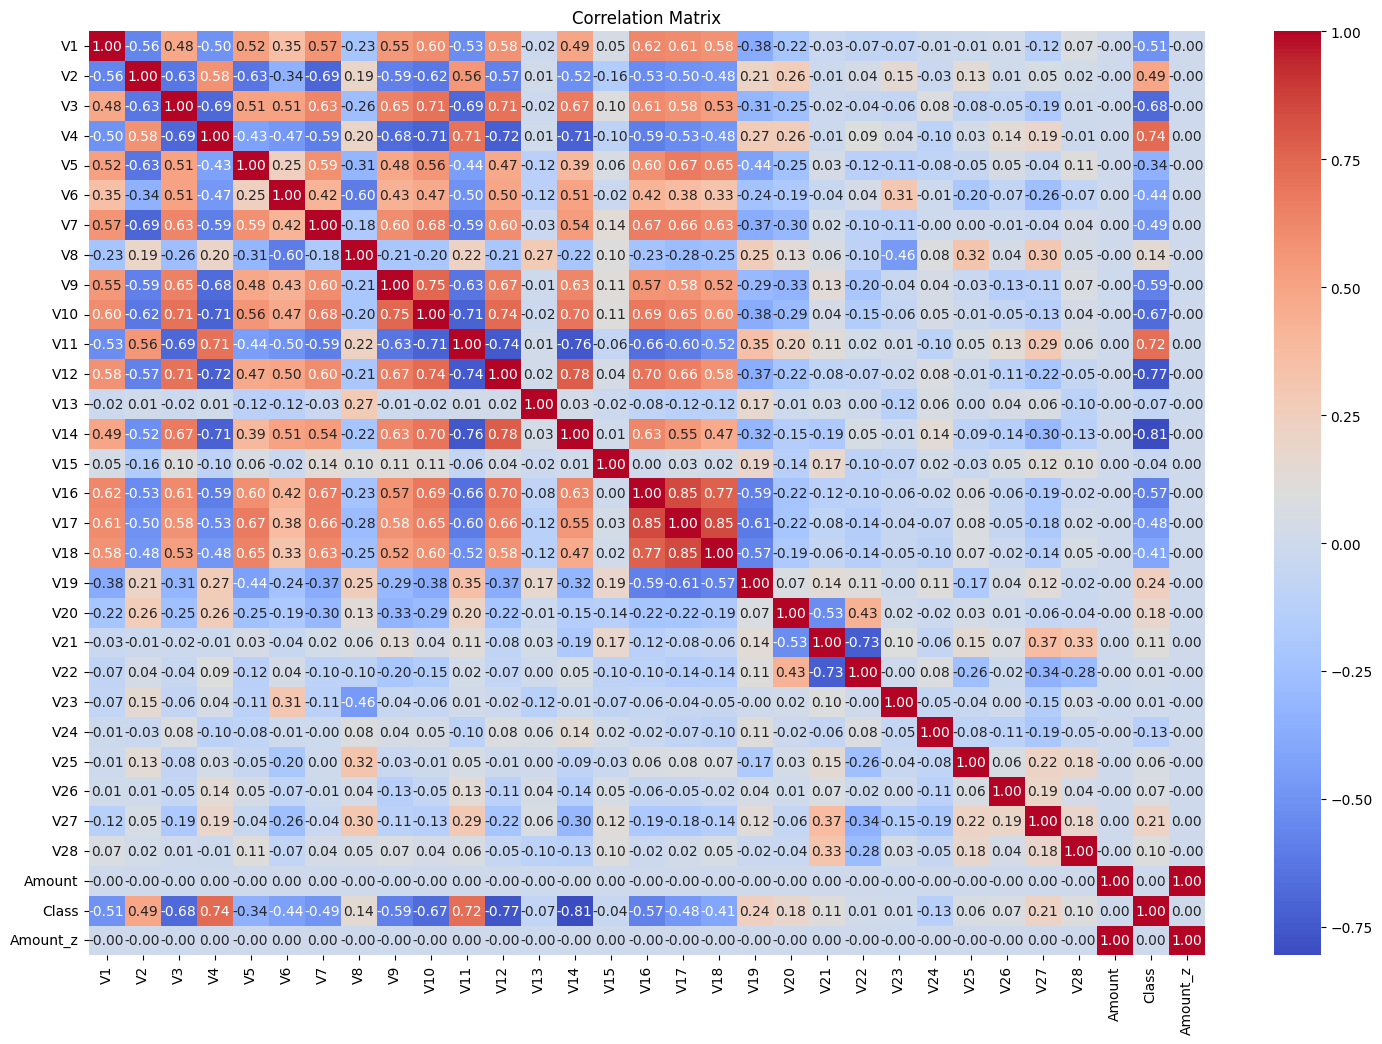

In [15]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')


**Interpretation: Following variables have highly/moderate correlation with Class column. We will consider them ('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18') for our multicollinearity analysis** 

# MultiCollinearity Analysis

Multicollinearity occurs when two or more independent variables in a dataset are highly correlated, leading to redundancy. This can distort model coefficients, making it difficult to determine the individual effect of each variable. It is often detected using metrics like the Variance Inflation Factor (VIF).








In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


columns_to_check = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']
X = df[columns_to_check]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=columns_to_check)

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data  # Return the VIF data

# Calculate VIF
vif_data = calculate_vif(X_scaled_df)

# Print initial VIF results
print("Initial VIF Results:")
print(vif_data)

# Checking for variables with high VIF
significant_variables = vif_data[vif_data['VIF'] < 10]
print("\nSignificant Variables (VIF < 10):")
print(significant_variables)

Initial VIF Results:
   Variable       VIF
0        V1  2.038165
1        V2  2.832108
2        V3  2.947538
3        V4  2.990543
4        V5  2.502989
5        V6  1.509626
6        V7  2.881574
7        V9  2.745241
8       V10  3.844022
9       V11  3.278386
10      V12  3.954016
11      V14  3.556232
12      V16  4.622876
13      V17  6.191176
14      V18  3.965417

Significant Variables (VIF < 10):
   Variable       VIF
0        V1  2.038165
1        V2  2.832108
2        V3  2.947538
3        V4  2.990543
4        V5  2.502989
5        V6  1.509626
6        V7  2.881574
7        V9  2.745241
8       V10  3.844022
9       V11  3.278386
10      V12  3.954016
11      V14  3.556232
12      V16  4.622876
13      V17  6.191176
14      V18  3.965417


**We have done Multicollinearity Analysis but we will not use it in our Modelling, as we will do modelling using Logistic regression using Ridge and Lasso Regression, Decision Trees and Random Forest which will eventually handle the multi-collinearity on its own, thus there is no requirement to use outcome of multicollinearity analysis in Modelling**  

# Isolation Forest for Outlier detection

**Outlier Detection**

Isolation Forest is a method used to find unusual or rare data points (outliers). It works by randomly cutting the data into smaller parts and checking how easily each data point can be separated from the rest.

**StandardScaler Before Outlier Detection**

StandardScaler is crucial before outlier detection because it normalizes features to have a mean of 0 and a standard deviation of 1, ensuring all features contribute equally to the model. This helps distance-based outlier detection algorithms (like Isolation Forest) avoid being dominated by features with larger ranges, allowing for more accurate identification of anomalies.



In [17]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = df.drop(columns=['Class', 'Amount'])  
scaled_features = scaler.fit_transform(features_to_scale)

scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(scaled_df)

df['Outlier'] = iso_forest.predict(scaled_features)
outliers = df[df['Outlier'] == -1]
print(f"Number of outliers detected: {len(outliers)}")
print(outliers.head())

output_file = "outliers_detected.xlsx"  
outliers.to_excel(output_file, index=False)
print(f"Outliers have been exported to {output_file}")

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers detected: 5687
             V1         V2        V3        V4         V5         V6  \
1632  -1.546398  -5.011909 -1.420525  1.170756  -4.298320   9.295606   
2963  -1.067257   0.920671 -0.289948 -1.136734  -1.281454   3.084163   
6812  -2.296470 -14.821249 -0.352617  0.901135   5.061739  -2.243356   
8610  -2.513872 -20.936274  2.186473  2.089193  41.540257 -18.642598   
14900 -1.419501  -3.344626  0.879352  0.145514   0.380627   1.498400   

              V7        V8        V9       V10  ...        V23       V24  \
1632   37.922674 -1.560395 -0.433834 -0.196730  ...  -2.659836  1.846789   
2963   -1.254006 -3.920475 -0.935984 -0.772498  ...   2.130080  1.852572   
6812    1.352711 -0.699928  3.376562  2.415090  ...  18.418155 -0.966277   
8610   -3.038728 -0.321438  8.183392  5.929237  ...  -9.277415  5.377507   
14900   2.714795 -1.078150  5.313542  6.334585  ...  -2.249118  0.215532   

             V25       V26        V27        V28    Amount  Class  Amount_z 

**Outlier Detection Result Interpretation:**


Total Number of Outliers Detected: 5,687

Fraud Cases (Outliers): 5,508 (approximately 97% of the outliers)

Non-Fraud Cases (Outliers): 179 (approximately 3% of the outliers)

This indicates that the Isolation Forest model was able to identify a large portion of fraud cases as outliers, while a small fraction of non-fraud cases were also flagged as outliers. This is an important result for further investigation and model refinement, as it suggests that fraud cases tend to exhibit abnormal behavior in relation to the other transactions in the dataset.

By identifying patterns in fraudulent transactions, businesses can target prevention measures more effectively



# Modelling

**Our goal is to classify transactions as either fraudulent or legitimate, it's essential to prevent overfitting.
Logistic regression is a commonly used model for fraud detection due to its interpretability and efficiency.
For logistic regression, you can use either L1 regularization (Lasso) or L2 regularization (Ridge). We will try both once at a time** 

In [18]:
X = df.drop('Class', axis=1)
y = df['Class']

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**To separate the dataset into train and test to identify the training size and testing size of the dataset.**



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression with Lasso and Ridge Regression

**Logistic Regression Model with Lasso Regression**

Lasso (L1 regularization): Lasso regression adds a penalty equivalent to the absolute value of the magnitude of coefficients. This can shrink some coefficients to zero, effectively performing feature selection by eliminating unimportant features.



In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')

log_reg_l1.fit(X_train_scaled, y_train)

accuracy = log_reg_l1.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9652410178850922


**Logistic Regression Model with Ridge Regression**

Ridge (L2 regularization): Ridge regression adds a penalty equivalent to the square of the magnitude of coefficients. Unlike Lasso, Ridge does not eliminate features but instead reduces their impact by shrinking the coefficients.



In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear')

log_reg_l2.fit(X_train_scaled, y_train)


accuracy = log_reg_l2.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9652849832052477


**Classification report of L1**

In [23]:
from sklearn.metrics import classification_report
# Make predictions on the test data
predictions_l1 = log_reg_l1.predict(X_test_scaled)

# Generate classification report
report_l1 = classification_report(y_test, predictions_l1)

print("Classification Report for L1 Regularization:")
print(report_l1)

Classification Report for L1 Regularization:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



**Print classification report of L2**

In [24]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = log_reg_l2.predict(X_test_scaled)

# Generate classification report
report = classification_report(y_test, predictions)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



**Credit Risk Scoring using Logistic regression (L2 regularization)**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

log_reg.fit(X_train_scaled, y_train)

probabilities = log_reg.predict_proba(X_test_scaled)

fraud_probabilities = probabilities[:, 1]

threshold = 0.7

y_pred_custom = (fraud_probabilities >= threshold).astype(int)

print(classification_report(y_test, y_pred_custom))

# AUC-ROC score
auc_roc = roc_auc_score(y_test, fraud_probabilities)
print("AUC-ROC:", auc_roc)

# Create a DataFrame to view the first 10 rows of predictions, actual values, and probabilities
output_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_custom,
    'Fraud Probability': fraud_probabilities
})

# Print the first 10 rows of the output DataFrame
print("\nFirst 10 rows of predictions:")
print(output_df.head(10))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96     56750
           1       0.99      0.94      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

AUC-ROC: 0.9934272976209474

First 10 rows of predictions:
        Actual  Predicted  Fraud Probability
437378       1          1           1.000000
504222       1          1           1.000000
4794         0          0           0.084001
388411       1          1           1.000000
424512       1          1           1.000000
123536       0          0           0.061092
333319       1          1           1.000000
369666       1          1           1.000000
62882        0          0           0.006569
414847       1          1           1.000000


### Further course of action:
**Basis the Fraud probability identified above, we can categorize the customer into Low, Medium and High risk category and accordingly upon inspecting the dataset we can frame the risk management policy basis the same.**

# Decision Tree Clasifier and Random Forest Classifier

Now let's try to use **Decision Tree Classifier and Random Forest Classifier** ML algorithm on our data 

Let's run each ML model one at a time 
First, we will run Decision Tree and then Random Forest.
Initially we will check the precision,recall and other performance metrics

 Since our goal is to find whether fraud has occured or not(i.e it is a classification task), we will use DecisionTreeClassifier for our operation.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

predictions = dt_classifier.predict(X_test)


report = classification_report(y_test, predictions)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



**We are getting 100% accuracy using DecisionTree Classifier, so this is a case of overfitting.**



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)

# Generate classification report
report = classification_report(y_test, predictions)

print("Random Forest Classifier Classification Report:")
print(report)


Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



**Even with Random Forest Classifier our accuracy is 100%, so we are facing problem of overfitting.**
 

**Lets try to reduce overfitting of decision tree using  Pruning technique** 

# Pruning with Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


#Lets start with Pruning with decision tree 
dt_classifier = DecisionTreeClassifier(max_depth=5)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

dt_report = classification_report(y_test, dt_predictions)
print("Decision Tree Classifier (Post-Pruning Classification Report:")
print(dt_report)



Decision Tree Classifier (Post-Pruning Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56750
           1       0.97      0.95      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



# Fraud detection using Neural Network (Deep learning)

**Now,we will using sigmoid and relu activation function along with Dropout ,Batch Normalization and Activation layers with our Neural network**

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Preprocessing: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model definition
model = Sequential([
    Dense(128, input_dim=31),  # Update input_dim to 31 as there are 31 features in X
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    
    Dense(64),
    BatchNormalization(),
    Activation('sigmoid'),
    Dropout(0.5),
    
    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(16),
    BatchNormalization(),
    Activation('sigmoid'),
    Dropout(0.5),
    
    Dense(8),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(1),
    Activation('sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Define early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

# Predict using the trained model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


2025-01-04 09:16:21.432965: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-04 09:16:21.433120: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-04 09:16:21.583161: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - accuracy: 0.9142 - auc: 0.9617 - loss: 0.2200 - val_accuracy: 0.9766 - val_auc: 0.9992 - val_loss: 0.0841
Epoch 2/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9727 - auc: 0.9950 - loss: 0.0799 - val_accuracy: 0.9879 - val_auc: 0.9996 - val_loss: 0.0857
Epoch 3/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9795 - auc: 0.9971 - loss: 0.0605 - val_accuracy: 0.9901 - val_auc: 0.9997 - val_loss: 0.0802
Epoch 4/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.9829 - auc: 0.9977 - loss: 0.0515 - val_accuracy: 0.9883 - val_auc: 0.9998 - val_loss: 0.1113
Epoch 5/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9837 - auc: 0.9981 - loss: 0.0472 - val_accuracy: 0.9757 - val_auc: 0.9997 - val_loss: 0.1289
Epoch 6/25
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9850 - auc: 0.9981 - loss: 0.0452 - val_accuracy: 0.9829 - val_auc: 0.9998 - val_loss: 0.1459
Epoch 7/25

### **Model Performance:**

Loss: 0.0174 (very low, indicating that the model's predictions are very close to the true values).

Test Accuracy: 99.65% (extremely high, suggesting the model correctly classifies nearly all transactions).

Test AUC (Area Under the Curve): 0.9998 (very close to 1, meaning the model performs exceptionally well in distinguishing between fraud and non-fraud transactions).

**Here, to prevent overfitting, we have used early stopping, a validation splitto ensure your model generalizes well without training for too many epochs.** 

**We would have further strengthen our model using Cross-Validation,Fine-Tune Hyperparameters etc. But here we will restrict ourselves to above result and take business decision using the same.**
,



# Business Implication due to model

**Pre-Implementation Example:**

Total Transactions: 568,630

Fraudulent Transactions (1%): 5,686

Non-Fraudulent Transactions (99%): 562,944

Fraud Loss per Case: ₹41,500

False Positives (5%): 28,147 (#assumed)

False Negatives (10%): 569 (#assumed)

Cost per False Positive Investigation: ₹830

Cost per False Negative Investigation: ₹4,150

**Pre-Implementation Costs:**
Total Fraud Loss = ₹2,357,390,000

False Positives Cost = ₹23,379,010

False Negatives Cost = ₹2,361,350

Total Cost = ₹2,383,130,360


**Post-Implementation Example:**
Fraud Loss per Case: ₹41,500

Recall for Fraud: 99%

False Positives (1%): 5,629

False Negatives (1%): 57

**Post-Implementation Costs:**

Total Fraud Loss = ₹2,336,535,500

False Positives Cost = ₹4,672,170

False Negatives Cost = ₹236,550

Total Cost = ₹2,341,444,220


**Conclusion:**

By implementing the improved model, the company saves ₹41,686,140 by reducing fraud losses, false positive investigations, and false negative costs. This highlights the business benefit of better fraud detection.






